# Lorenz Equations

In [48]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation as FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.axes3d as p3
from scipy.stats import linregress
import os

In [49]:
%matplotlib notebook

## Problem 1
Write a function that implements the Lorenz equations. Let $\sigma = 10$, $\rho = 28$, $\beta = 8$ . Make a 3D plot of a solution to the Lorenz equations for an initial condition where $(x, y, z)$ are drawn randomly from a uniform distribution from −15 to 15. As usual, use `scipy .integrate.odeint` to compute the solution.

In [4]:
sigma=10
rho=28
beta=8/3

def lorenz(x,t):
    """Implements Lorenz equations:
    
    dx/dt = σ(y − x)
    dy/dt = ρx − y − xz
    dz/dt = xy − βz
        
    Parameters:
        x ((3,) ndarray): The state values (x,y,z)
        t (float): The time value t
    Returns:
        ((3,) ndarray): The derivative values
    """
    #Return RHS of Lorenz equation
    ds = np.array([sigma*(x[1]-x[0]), rho*x[0] - x[1] - x[0]*x[2], x[0]*x[1] - beta*x[2]])
    return ds    

In [5]:
#Get solution
sol = odeint(lorenz, np.random.uniform(-15, 15, 3), np.linspace(0, 30, 50000))
xs, ys, zs = zip(*sol)

<IPython.core.display.Javascript object>


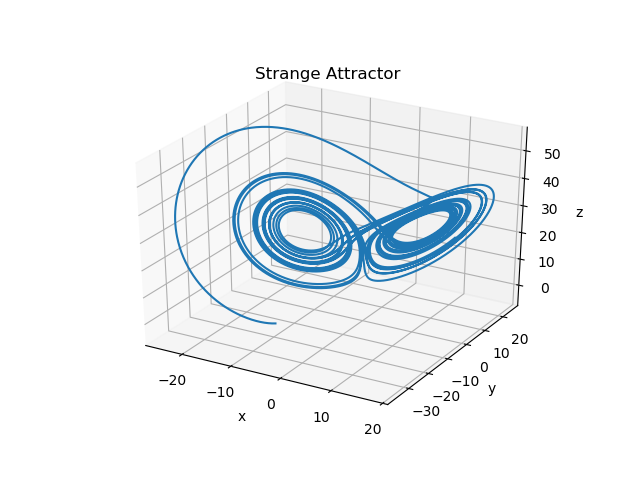

In [6]:
#Make plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot(xs, ys, zs)
plt.title("Strange Attractor")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

## Problem 2
To better visualize the Lorenz attractor, produce a single 3D plot displaying three solutions to the Lorenz equations, each with random initial conditions.

In [8]:
#Get solutions
sol1 = odeint(lorenz, np.random.uniform(-15, 15, 3), np.linspace(0, 30, 50000))
xs1, ys1, zs1 = zip(*sol1)
sol2 = odeint(lorenz, np.random.uniform(-15, 15, 3), np.linspace(0, 30, 50000))
xs2, ys2, zs2 = zip(*sol2)
sol3 = odeint(lorenz, np.random.uniform(-15, 15, 3), np.linspace(0, 30, 50000))
xs3, ys3, zs3 = zip(*sol3)

#Make plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot(xs1, ys1, zs1, color="Blue")
ax.plot(xs2, ys2, zs2, color="Red")
ax.plot(xs3, ys3, zs3, color="Green")
plt.title("Strange Attractor")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

<IPython.core.display.Javascript object>

## Problem 3
Use `matplotlib.animation.FuncAnimation` to produce a 3D animation of two solutions to the Lorenz equations with similar initial conditions. To make similar initial conditions, draw $(x_1,y_1,z_1)$ randomly as before, and then produce $(x_2,y_2,z_2)$ by adding a small perturbation: `np.random.randn(3)*(1e-10)`. It will take several seconds before the separation between the two solutions will be noticeable.

The animation should have a point marker and the past trajectory curve for each solution. Save your animation as `lorenz_animation1.mp4`.

(Recall that you can display the saved animation in a Jupyter notebook by running the follwing code in a markdown cell):

`<video src='lorenz_animation1.mp4' controls>`

In [16]:
#Get solutions
np.random.seed(4)
y0 = np.random.uniform(-15, 15, 3)
y0p = y0+np.random.randn(3)*(1e-2)
num_seconds = 10
fps = 100
num_samples = num_seconds*fps
sol1 = odeint(lorenz, y0, np.linspace(0, num_seconds, num_samples))
xs1, ys1, zs1 = zip(*sol1)
sol2 = odeint(lorenz, y0p, np.linspace(0, num_seconds, num_samples))
xs2, ys2, zs2 = zip(*sol2)

# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

data = [sol1.T, sol2.T]
lines = [ax.plot(xs1[0:1], ys1[0:1], zs1[0:1])[0], ax.plot(xs2[0:1], ys2[0:1], zs2[0:1])[0]]
points = [ax.plot(xs1[0:1], ys1[0:1], zs1[0:1], "go", color="Blue")[0],
          ax.plot(xs2[0:1], ys2[0:1], zs2[0:1], "go", color="Orange")[0]]

def update_lines(num, dataLines, lines, points):
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    for point, data in zip(points, dataLines):
        point.set_data(data[0:2, num])
        point.set_3d_properties(data[2, num])
    return lines+points

# Setting the axes properties
ax.set_xlim3d([np.min([np.min(xs1), np.min(xs2)]), np.max([np.max(xs1), np.max(xs2)])])
ax.set_xlabel('X')

ax.set_ylim3d([np.min([np.min(ys1), np.min(ys2)]), np.max([np.max(ys1), np.max(ys2)])])
ax.set_ylabel('Y')

ax.set_zlim3d([np.min([np.min(zs1), np.min(zs2)]), np.max([np.max(zs1), np.max(zs2)])])
ax.set_zlabel('Z')
ax.set_title("Sensitivity to initial conditions")

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, num_samples, fargs=(data, lines, points),
                                   interval=1, blit=False)

#FIXME: Can't save my animation
my_writer = animation.FFMpegWriter(fps=fps)
line_ani.save("lorenz_animation1.mp4", writer=my_writer)
plt.close()

<video src='lorenz_animation1.mp4' controls>

## Problem 4
The `odeint` function allows users to specify error tolerances (similar to setting a value of $h$ for a Runge-Kutta method). Using a single random initial condition, produce two approximations by using the odeint arguments `(atol=1e-15, rtol=1e-13)` for the first approximation and `(atol=1e-12, rtol=1e-10)` for the second.
As in the previous problem, use `FuncAnimation` to animate both solutions. Save the animation as `lorenz_animation2.mp4`.

In [18]:
#Get solutions
np.random.seed(4)
y0 = np.random.uniform(-15, 15, 3)
num_seconds = 25
fps = 100
num_samples = num_seconds*fps
sol1 = odeint(lorenz, y0, np.linspace(0, num_seconds, num_samples), atol=1e-15)
xs1, ys1, zs1 = zip(*sol1)
sol2 = odeint(lorenz, y0, np.linspace(0, num_seconds, num_samples), atol=1e-13)
xs2, ys2, zs2 = zip(*sol2)

# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

data = [sol1.T, sol2.T]
lines = [ax.plot(xs1[0:1], ys1[0:1], zs1[0:1])[0], ax.plot(xs2[0:1], ys2[0:1], zs2[0:1])[0]]
points = [ax.plot(xs1[0:1], ys1[0:1], zs1[0:1], "go", color="Blue")[0],
          ax.plot(xs2[0:1], ys2[0:1], zs2[0:1], "go", color="Orange")[0]]

def update_lines(num, dataLines, lines, points):
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    for point, data in zip(points, dataLines):
        point.set_data(data[0:2, num])
        point.set_3d_properties(data[2, num])
    return lines+points

# Setting the axes properties
ax.set_xlim3d([np.min([np.min(xs1), np.min(xs2)]), np.max([np.max(xs1), np.max(xs2)])])
ax.set_xlabel('X')

ax.set_ylim3d([np.min([np.min(ys1), np.min(ys2)]), np.max([np.max(ys1), np.max(ys2)])])
ax.set_ylabel('Y')

ax.set_zlim3d([np.min([np.min(zs1), np.min(zs2)]), np.max([np.max(zs1), np.max(zs2)])])
ax.set_zlabel('Z')
ax.set_title("Sensitivity to round-off error")

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, num_samples, fargs=(data, lines, points),
                                   interval=1, blit=False)
#FIXME: Can't save my animation
my_writer = animation.FFMpegWriter(fps=fps)
line_ani.save("lorenz_animation2.mp4", writer=my_writer)
plt.close()

<video src="lorenz_animation2.mp4" controls>

## Problem 5
Estimate the Lyapunov exponent of the Lorenz equations by doing the following:
* Produce an initial condition that already lies on the attractor. This can be done by using a random "dummy" initial condition, approximating the resulting solution to the Lorenz system for a short time, and then using the endpoint of that solution (which is now on the attractor) as the desired intital condition.
* Produce a second initial condition by adding a small perturbation to the first (as before).
* For both initial conditions, use `odeint` to produce approximate solutions for $0 \leq t \leq 10$.
* Compute $||\delta(t)||$ by taking the norm of the vector difference between the two solutions for each value of $t$.
* Use `scipy.stats.linregress` to calculate a best-fit line for $\log(||\delta(t)||)$ against $t$.
* The slope of the resulting best-fit line is an approximation of the Lyapunov exponent $\lambda$.

Produce a plot similar to Figure 1.3 using `plt.semilogy`.

Hint: Remember that the best-fit line you calculated corresponds to a best-fit exponential for $||\delta(t)||$. If `a` and `b` are the slope and intercept of the best-fit line, the best-fit exponential can be plotted using `plt.semilogy(t,np.exp(a*t+b))`.

<IPython.core.display.Javascript object>


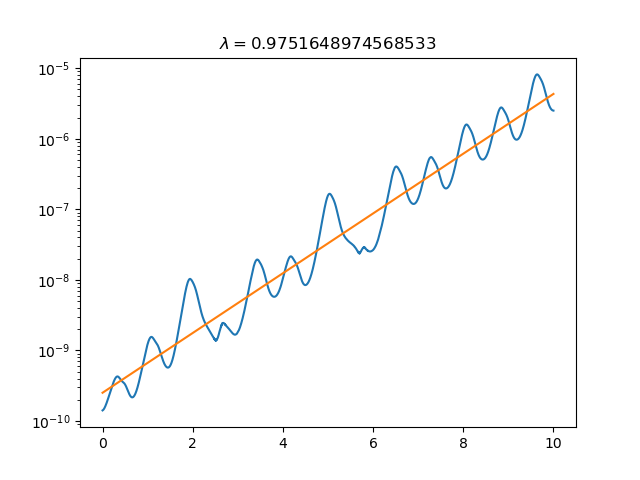

In [89]:
#Get initial condition in attractor
y0 = np.random.uniform(-15, 15, 3)
num_seconds = 10
fps = 1000
num_samples = num_seconds*fps
sol1 = odeint(lorenz, y0, np.linspace(0, num_seconds, num_samples))

#Initial condition
y0 = sol1[-1]
#Perterbation
y0p = y0+np.random.randn(3)*(1e-10)

#Get solutions
num_seconds = 10
fps = 1000
num_samples = num_seconds*fps
xs = np.linspace(0, num_seconds, num_samples)
sol1 = odeint(lorenz, y0, xs)
# xs1, ys1, zs1 = zip(*sol1)
sol2 = odeint(lorenz, y0p, xs)
# xs2, ys2, zs2 = zip(*sol2)

#Calculate Norms
norms = np.linalg.norm(sol1-sol2, axis=1)

#Caculate best fit
slope, intercept, rvalue, pvalue, stderr = linregress(xs, np.log(norms))

# #Make plot
plt.close()
plt.semilogy(xs, norms)
plt.semilogy(xs, np.exp(slope*xs+intercept))
plt.title(r"$\lambda = {}$".format(slope))
plt.show()

In [57]:
norms

array([5.53518140e-11, 5.37028319e-11, 5.20271975e-11, 5.02826907e-11,
       4.84365189e-11, 4.65101008e-11, 4.44966684e-11, 4.24496536e-11,
       4.03893374e-11, 3.82809576e-11, 3.62656036e-11, 3.43650044e-11,
       3.25196329e-11, 3.08361738e-11, 2.92527560e-11, 2.77872962e-11,
       2.64742857e-11, 2.52721709e-11, 2.41784685e-11, 2.32683753e-11,
       2.24385796e-11, 2.17756611e-11, 2.13234213e-11, 2.08907648e-11,
       2.06149396e-11, 2.04576512e-11, 2.04437935e-11, 2.05785427e-11,
       2.08637007e-11, 2.12974177e-11, 2.18894555e-11, 2.26355320e-11,
       2.35470543e-11, 2.46265927e-11, 2.58870757e-11, 2.73374904e-11,
       2.89899966e-11, 3.08511584e-11, 3.28998435e-11, 3.51492293e-11,
       3.76149497e-11, 4.03027433e-11, 4.32160823e-11, 4.63531741e-11,
       4.97065035e-11, 5.32643162e-11, 5.70033717e-11, 6.08938879e-11,
       6.49047048e-11, 6.80028546e-11, 7.47866526e-11, 7.99433603e-11,
       8.57892862e-11, 9.16147274e-11, 9.78976411e-11, 1.04254645e-10,
      